In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

# fish_input[:5]
fish_target = fish["Species"].to_numpy()
fish_target[:10]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, stratify=fish_target)

In [7]:
print(np.shape(train_input))
print(np.shape(test_input))

(119, 5)
(40, 5)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
z = np.arange(-5, 5, 0.1)
prob_y = 1/(1 + np.exp(-z))

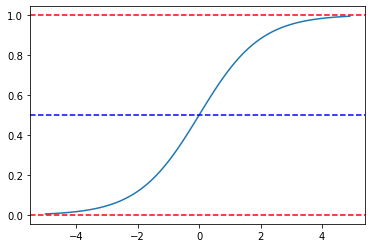

In [11]:
plt.plot(z, prob_y)

plt.axhline(1, linestyle = "--", color = "r")
plt.axhline(0, linestyle = "--", color = "r")
plt.axhline(0.5, linestyle = "--", color = "b")

plt.show()

In [12]:
bream_smelt_index = (train_target == "Bream") | (train_target == "Smelt")
## bolean index
bream_smelt_index

array([ True, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True])

In [13]:
train_bream_smelt = train_scaled[bream_smelt_index]
target_bream_smelt = train_target[bream_smelt_index]

print(np.shape(train_scaled))
print(np.shape(train_bream_smelt))

(119, 5)
(36, 5)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [16]:
print(lr.predict(train_bream_smelt[:5]))
print(train_bream_smelt[:5])
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Bream' 'Bream' 'Smelt' 'Bream']
[[ 0.04611102  0.07700393  0.25722365  1.09539035  0.17445264]
 [ 1.2970352   0.93214084  1.10587292  2.17639325  1.27730092]
 [ 0.70449217  0.34704716  0.52346656  1.29011336  0.42998431]
 [-1.11342985 -1.63326991 -1.66471734 -1.59247001 -1.82987385]
 [ 0.3753016   0.43706157  0.62330765  1.35113643  0.59437866]]
[[9.72275311e-01 2.77246888e-02]
 [9.99156256e-01 8.43744498e-04]
 [9.89823683e-01 1.01763172e-02]
 [3.27715706e-02 9.67228429e-01]
 [9.91270363e-01 8.72963703e-03]]


In [17]:
print(lr.coef_, lr.intercept_)

[[-0.45122631 -0.61413005 -0.68415155 -0.95797769 -0.73782088]] [-2.13516449]


In [21]:
# C = 1/lambda
lr = LogisticRegression(C =20, max_iter = 1000)

lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [22]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.907563025210084
0.925


In [27]:
print(lr.predict(test_scaled[:10]))
print(test_target[:10])

['Perch' 'Parkki' 'Roach' 'Perch' 'Roach' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch']
['Perch' 'Parkki' 'Whitefish' 'Perch' 'Roach' 'Perch' 'Perch' 'Roach'
 'Roach' 'Perch']


In [29]:
lr.predict_proba(test_scaled[:5]).round(3)

array([[0.   , 0.012, 0.846, 0.   , 0.132, 0.003, 0.006],
       [0.   , 0.867, 0.005, 0.   , 0.116, 0.002, 0.01 ],
       [0.005, 0.019, 0.305, 0.015, 0.516, 0.   , 0.139],
       [0.002, 0.   , 0.896, 0.002, 0.009, 0.   , 0.091],
       [0.   , 0.03 , 0.345, 0.002, 0.593, 0.002, 0.027]])

In [30]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
print(lr.coef_)
print(lr.intercept_)

[[-1.21844637  0.28672707  2.48200636  7.42430336 -1.38906057]
 [-1.11545317 -2.46834487 -3.07058635  6.9008083  -1.51298126]
 [ 3.7877996   5.83673045 -8.86152511 -6.90736683  5.02849073]
 [-0.23393704  3.48993677  3.78026761 -3.04171287 -1.32868397]
 [-1.9729665  -5.53448961  4.74848212 -0.99423866  2.1205672 ]
 [-0.93068137  0.79731757  1.06632451 -4.48410101 -5.48103396]
 [ 1.68368486 -2.40787738 -0.14496915  1.10230771  2.56270183]]
[ 0.26194801 -0.50855698  2.86871274  0.29650495  2.20536014 -7.79929503
  2.67532617]
